In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### import iris dataset from sklearn datasets

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

### Dictionary-like object, the interesting attributes are: either data, the raw text data to learn, or ‘filenames’, the files holding it, ‘target’, the classification labels (integer index), ‘target_names’, the meaning of the labels, and ‘DESCR’, the full description of the dataset.

In [5]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

#### targert_names of the iris dataset that we are going to predict based on available attributes whether the iris flower is setosa or versicolor or virginica

In [6]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df=pd.DataFrame(iris.data,columns=iris["feature_names"])

In [8]:
df["target"]=iris.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [11]:
df.shape

(150, 5)

In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [14]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [15]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

In [16]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### plotting a graph for identification of iris flower whether it is(setosa or versicolor or virginica)  based on sepal width and sepal length.

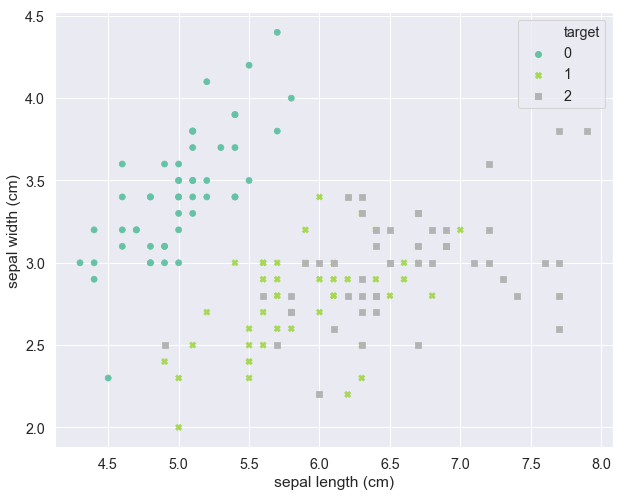

In [17]:
plt.figure(figsize=(10,8))
sns.set(font_scale=(1.3))
sns.scatterplot(x="sepal length (cm)",y="sepal width (cm)",hue="target",style="target",sizes=150,data=df,marker="+",palette="Set2")

#### plotting a graph for identification of iris flower whether it is(setosa or versicolor or virginica)  based on petal width and petal length.

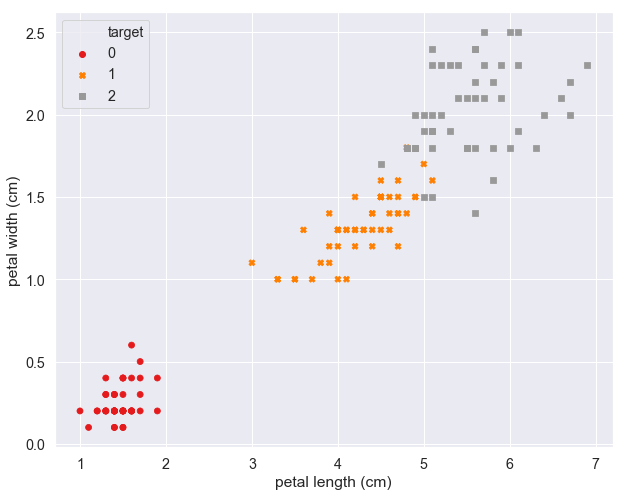

In [18]:
plt.figure(figsize=(10,8))
sns.set(font_scale=(1.3))
sns.scatterplot(x="petal length (cm)",y="petal width (cm)",hue="target",style="target",sizes=150,data=df,marker="+",palette="Set1")

#### in target we have descrete values(0,1,2) now adding one more column flower_name based on target value

### 0-setosa,1-versicolor,2-viriginica

In [19]:
df["flower_names"]=df.target.apply(lambda x:iris["target_names"][x])

In [20]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#### examine the graphs using matlab

In [21]:
df0=df[df["target"]==0]
df1=df[df["target"]==1]
df2=df[df["target"]==2]


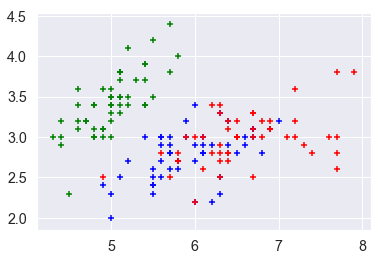

In [22]:
plt.scatter(x=df0["sepal length (cm)"],y=df0["sepal width (cm)"],color="green",marker="+")
plt.scatter(x=df1["sepal length (cm)"],y=df1["sepal width (cm)"],color="blue",marker="+")
plt.scatter(x=df2["sepal length (cm)"],y=df2["sepal width (cm)"],color="red",marker="+")

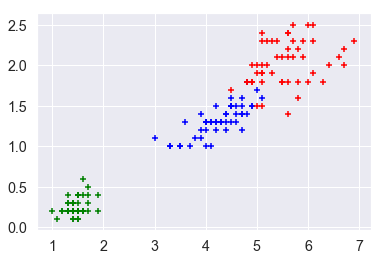

In [23]:
plt.scatter(x=df0["petal length (cm)"],y=df0["petal width (cm)"],color="green",marker="+")
plt.scatter(x=df1["petal length (cm)"],y=df1["petal width (cm)"],color="blue",marker="+")
plt.scatter(x=df2["petal length (cm)"],y=df2["petal width (cm)"],color="red",marker="+")

### Allocating attributes and the lables for the data
#### X- attributes
#### Y-labels

In [24]:
X=df.iloc[0:,0:-2]
Y=df.iloc[0:,-2]


#### Training,Testing,Splitting the data

In [25]:
##splitting our data into parts like, train,test,split.
from sklearn.model_selection import train_test_split


#### we are giving X-->Features, Y--> Labels
##### Test ,Train size refers to the how much data is used for the test and the train
##### random state takes data randomly if we gaiven any number like 10, 20 or if you give  0 it will take data in sequence way

In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)### Here i am using 70% of my data to train my model and
# 30% of the data to test the model 


#### Scaling Every data point in the data set ,ranges from (0 to 1)

In [27]:
from sklearn.preprocessing import StandardScaler#standard scaler the function is used to bring different range data into same range(0 to1)
sc = StandardScaler()#this function creating the variable
X_train = sc.fit_transform(x_train)#fitting into the standard scaler for train data
X_test = sc.transform(x_test)#fitting for the test data


#### For this Data I am using Support Vector Classifier

In [28]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
y_predict=model.predict(X_test)

In [30]:
#### 

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9555555555555556

### Confusion Matrix For the Data

In [32]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_predict)

### plotting heat map for confusion_matrix

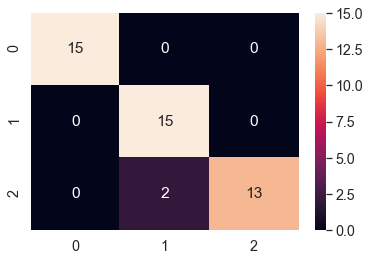

In [33]:
sns.heatmap(c,annot=True,fmt='d')